# Tarea Semanal 14

#### Por Joaquín López Tramullas
---------------------------------------------------------------

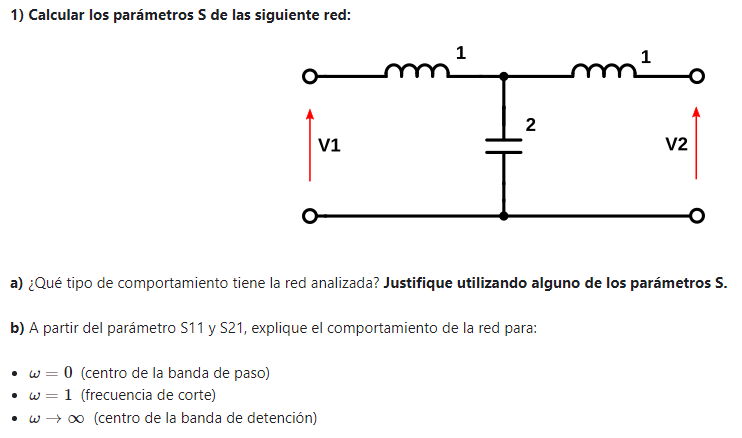

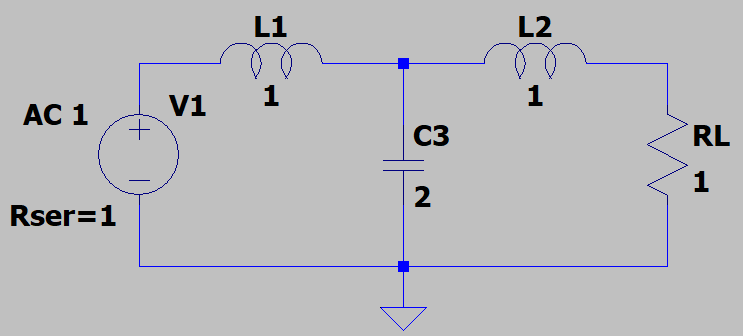

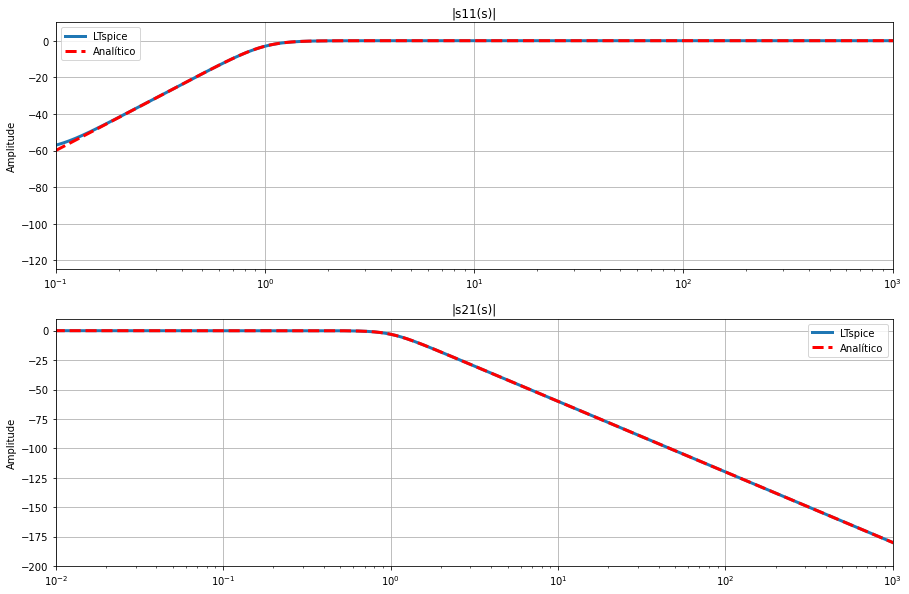

In [11]:
import ltspice
import matplotlib.pyplot as plt
import scipy.signal as sig
import sympy as sim
import numpy as np

l = ltspice.Ltspice("./Simulacion/TS14.raw")
l.parse()

# Obtengo curvas de simulación en ltspice
freq = l.get_frequency()
s11 =l.get_data('S11(V1)')
s21 =l.get_data('S21(V1)')

# Calculo |s11(s)| y |s21(s)|
s11_amplitude = 20 * np.log10(np.abs(s11))
s21_amplitude = 20 * np.log10(np.abs(s21))

# Defino num y den de s11(s) y de s21(s)
s11_num = [1, 0, 0, 0]
s11_den = [1, 2, 2, 1]

s21_num = [1]
s21_den = [1, 2, 2, 1]

# Obtengo s11(s) y s21(s)
w_s11, s11_s = sig.freqs(s11_num,s11_den,freq*2*np.pi)
w_s21, s21_s = sig.freqs(s21_num,s21_den,freq*2*np.pi)

# Ploteo
plt.close('all')
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0].semilogx(freq*2*np.pi, s11_amplitude, linewidth=3.0, label='LTspice')
ax[0].semilogx(w_s11, 20*np.log10(np.abs(s11_s)), 'r--', linewidth=3.0, label='Analítico')
ax[0].set_title("|s11(s)|")
ax[0].set_ylabel("Amplitude")
ax[0].set_xlim([0.1,1000])
ax[0].set_ylim([-125,10])
ax[0].legend()
ax[0].grid()

ax[1].semilogx(freq*2*np.pi, s21_amplitude, linewidth=3.0, label='LTspice')
ax[1].semilogx(w_s21, 20*np.log10(np.abs(s21_s)), 'r--', linewidth=3.0, label='Analítico')
ax[1].set_title("|s21(s)|")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([0.01,1000])
ax[1].set_ylim([-200,10])
ax[1].legend()
ax[1].grid()

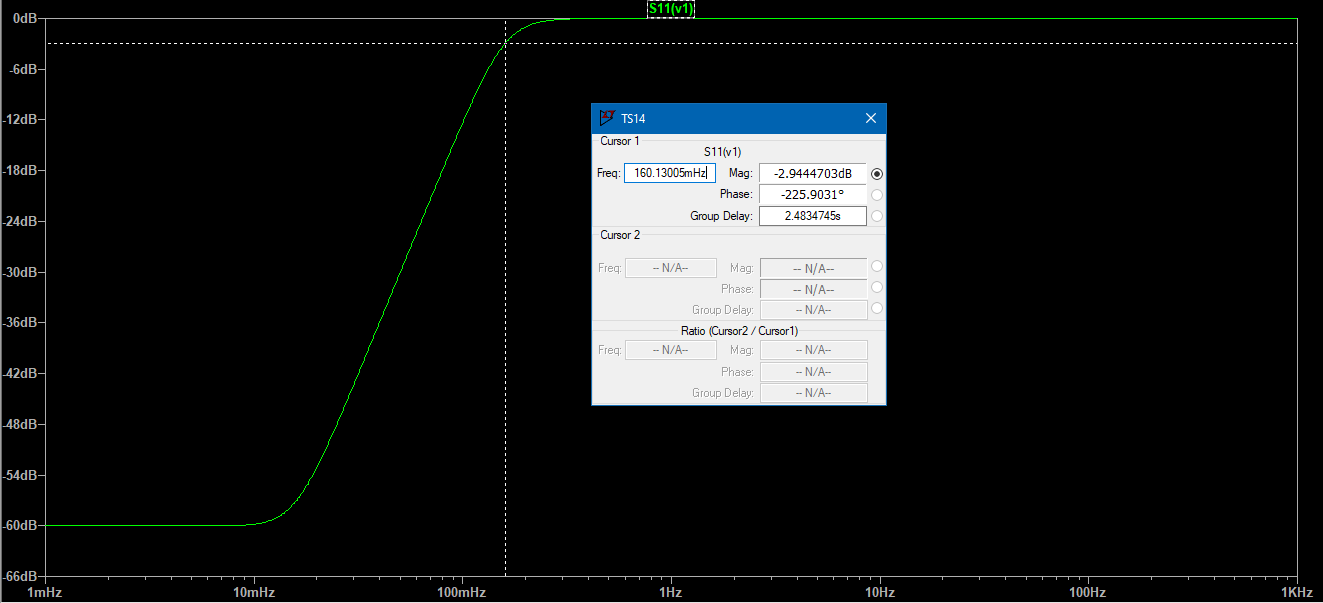

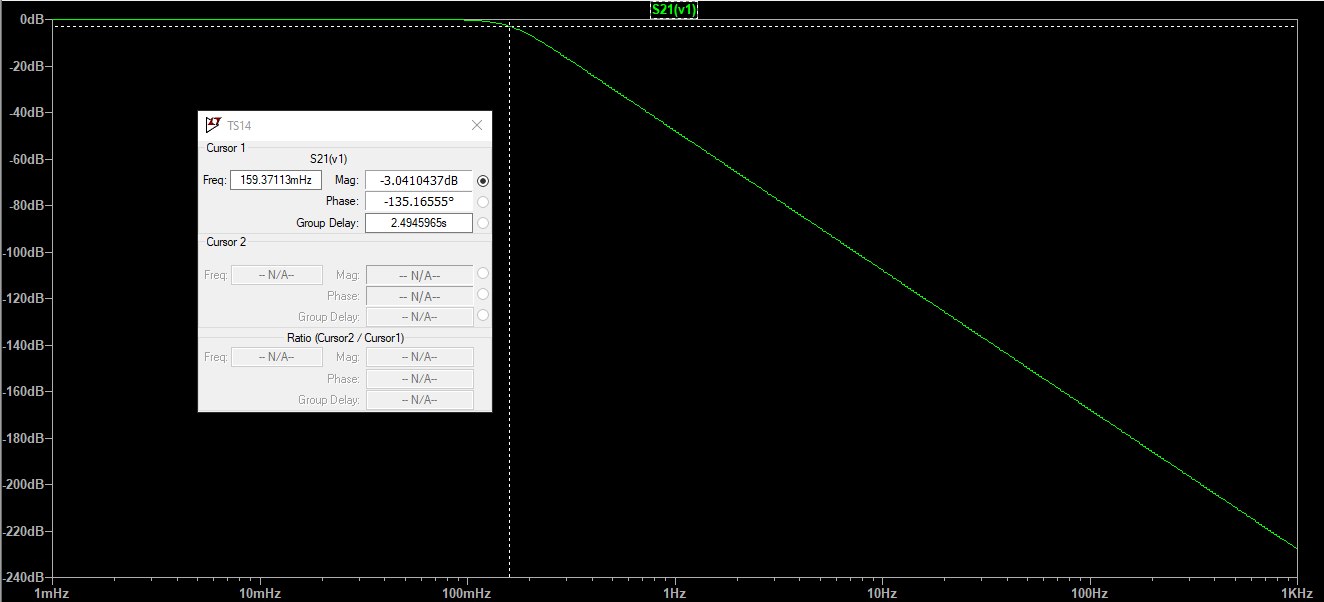

Se observa que tanto en s11 como en s21, para w = 1 (159mHz) se tiene una caida de 3dB, equivalente al valor de 0,707 calculado en la teoría.